# Word Embeddings 

In this assignment you will have to do the following activities:

Load the vectors in an appropriate format (you can use float32 to reduce memory print).
Write a function that takes as argument a word and returns the 20 most similar words by cosine similarity.
Write a function that takes as arguments a list of words and returns the corresponding vectors in a numpy array. Then use the utility function below to plot the vectors. When testing your code try to use lists of words that contain groups of semantically close words

In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
embeddingsdict = {}
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddingsdict[word] = vector

In [5]:
def find_closest_embeddings(embedding):
    return sorted(embeddingsdict.keys(), key=lambda word: spatial.distance.cosine(embeddingsdict[word], embedding))

Twenty Similar words to word 'the' are

In [6]:
similar_words = find_closest_embeddings(embeddingsdict["the"])
similar_words = similar_words[:20]
similar_words

['the',
 'which',
 'part',
 'in',
 'of',
 'on',
 'one',
 '.',
 'as',
 'this',
 'its',
 'same',
 'first',
 'entire',
 'also',
 'it',
 'to',
 'another',
 'came',
 'for']

In [7]:
def plot_word_embeddings(words,vectors,num_neighbors=2):
    """
    Utility function to do a 2d plot of word-embeddings with annotations.
    
    param words: list of words
    param vectors: array of word embeddings corresponding to the list of words
    param num_neighbors: number of neighbors to consider in the UMAP projection
    """
    # Project the 50d vectors to a 2d space
    V_umap = umap.UMAP(n_neighbors=num_neighbors,min_dist=0.2).fit_transform(vectors)
    
    fig= plt.figure(figsize=(12,6))

    plt.scatter(V_umap[:, 0], V_umap[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
    plt.show()

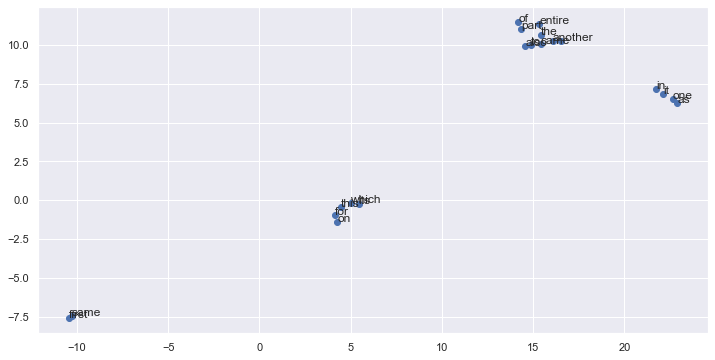

In [8]:
from numpy.random import default_rng
sns.set()
# random embeddings just to test the function
rng = default_rng()
embeddings = rng.uniform(size=(len(similar_words),50))

plot_word_embeddings(similar_words,embeddings)